In [1]:
import iris
import sklearn
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import iris.quickplot as qplt
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
def load_temp(n):
    crut_file = "/Users/admin/Downloads/HadCRUT.4.4.0.0.anomalies.1_to_10_netcdf/HadCRUT.4.4.0.0.anomalies.%d.nc"%n
    crut = iris.load(crut_file)
    temp = crut[0]
    for t in range(temp.data.shape[0]):
        temp.data[t] = temp.data[t] / max(temp.data[t].max(), -temp.data[t].min())
        temp.data[t].set_fill_value(temp.data[t].mean())
    return temp

temps = []
for i in range(1,11):
    temps.append(load_temp(i))
temps

/Users/admin/miniconda2/lib/python2.7/site-packages/iris/fileformats/cf.py:1139: UserWarning: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warnings.warn(msg)


[<iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>]

In [3]:
pca = PCA(n_components=12)

In [4]:
X = temps[0].data.filled().reshape(1995, 72*36)[1500:]

/Users/admin/miniconda2/lib/python2.7/site-packages/iris/coords.py:802: UserWarning: Coordinate u'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/Users/admin/miniconda2/lib/python2.7/site-packages/iris/coords.py:802: UserWarning: Coordinate u'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


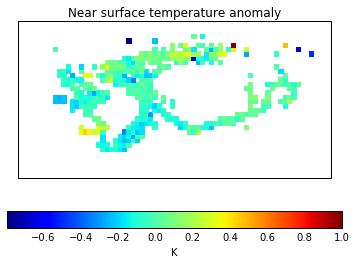

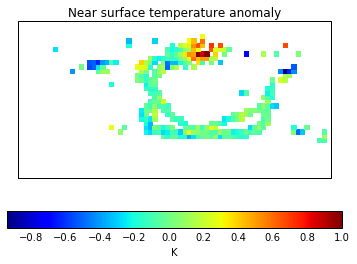

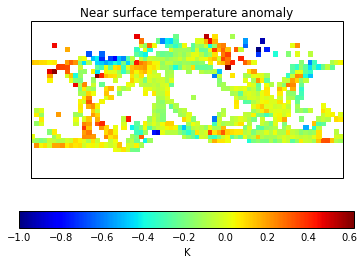

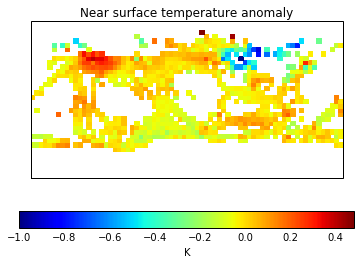

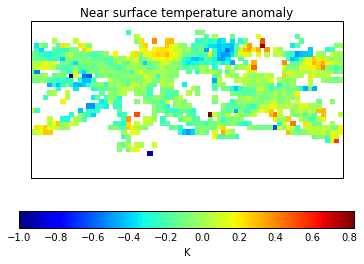

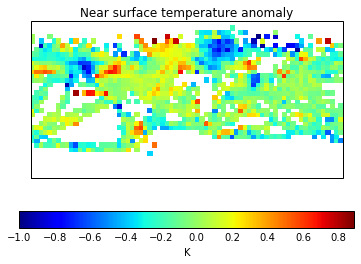

In [5]:
for i in [1,200,400,600,800,1000]:
    qplt.pcolormesh(temps[0][i,:,:])
    plt.show()

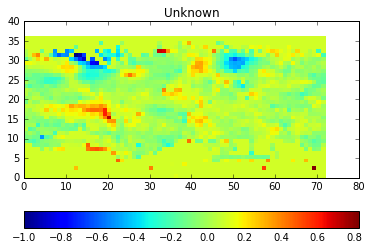

In [6]:
qplt.pcolormesh(iris.cube.Cube(X.reshape(X.shape[0], 36, 72)[100,:,:]))
plt.show()

In [20]:
pca.fit(X)

PCA(copy=True, n_components=12, whiten=False)

In [8]:
pca.components_[0].shape

(2592,)

In [9]:
pca.score(X)

1191.5383

In [10]:
pca.components_.shape

(12, 2592)

In [11]:
pca.explained_variance_ratio_

array([ 0.10293934,  0.06157754,  0.05323845,  0.04001308,  0.03907721,
        0.03411247,  0.03221187,  0.02468956,  0.02241866,  0.01816595,
        0.01548091,  0.0154132 ], dtype=float32)

In [12]:
comp_cubes = []
for c in pca.components_:
    comp_cubes.append(iris.cube.Cube(data=c.reshape(36, 72)))

In [13]:
plt.pcolormesh?

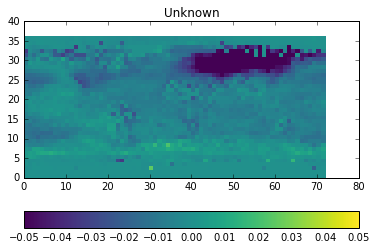

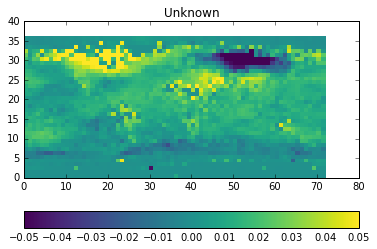

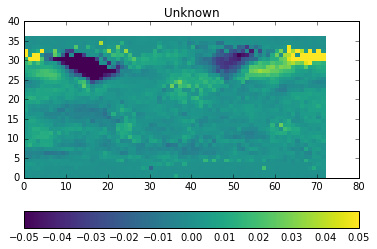

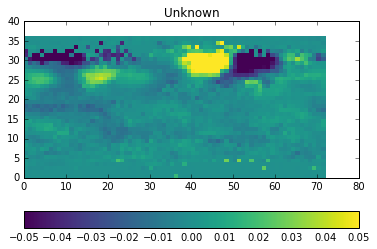

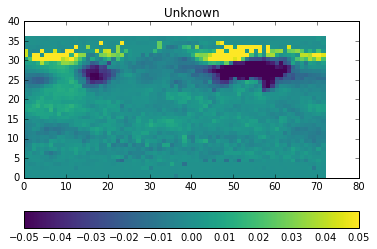

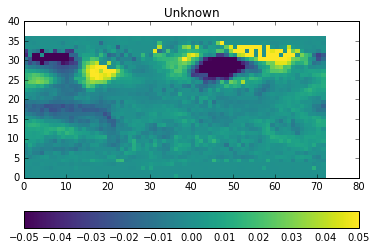

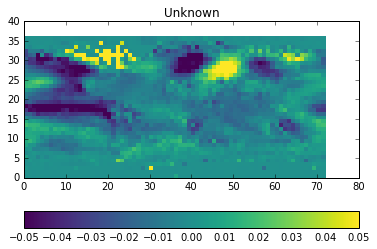

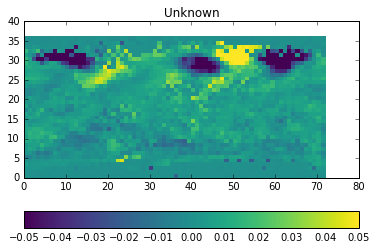

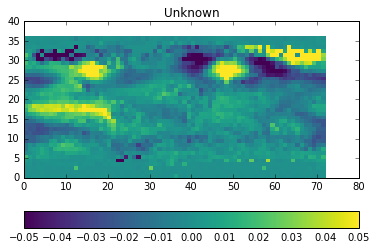

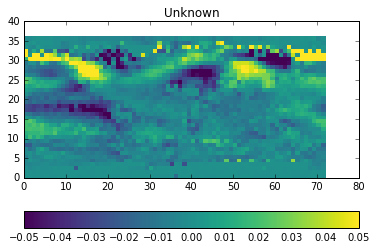

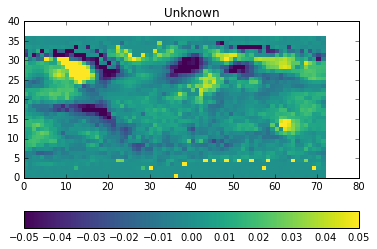

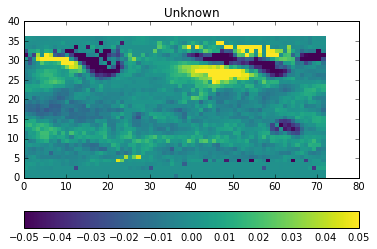

In [21]:
for cc in comp_cubes:
    qplt.pcolormesh(cc, vmin=-0.05, vmax=0.05, cmap="viridis")
    plt.show()

In [15]:
pca.get_covariance()

array([[  5.16202338e-02,  -7.90011282e-15,  -2.32570904e-14, ...,
         -5.68035119e-10,  -2.16324545e-11,   1.94765402e-11],
       [ -7.90011282e-15,   5.16202338e-02,   4.51099890e-15, ...,
          4.47256648e-10,   1.82298829e-10,   9.17517243e-11],
       [ -2.32570904e-14,   4.51099890e-15,   5.16202338e-02, ...,
          5.32614453e-10,  -9.00483507e-11,   7.25981983e-11],
       ..., 
       [ -5.68035063e-10,   4.47256648e-10,   5.32614453e-10, ...,
          5.16611263e-02,   2.37009476e-06,   5.80628694e-06],
       [ -2.16324389e-11,   1.82298815e-10,  -9.00483507e-11, ...,
          2.37009385e-06,   5.16717285e-02,   7.85938209e-06],
       [  1.94765384e-11,   9.17517243e-11,   7.25981983e-11, ...,
          5.80628694e-06,   7.85938209e-06,   5.16248979e-02]], dtype=float32)

In [16]:
pts = X[0]

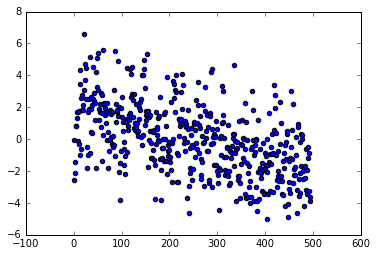

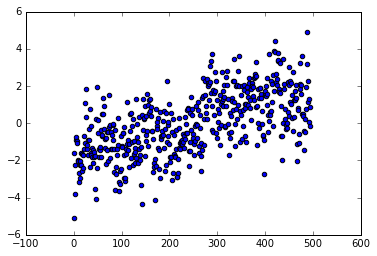

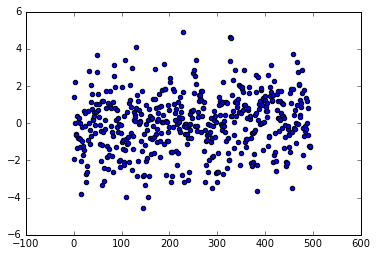

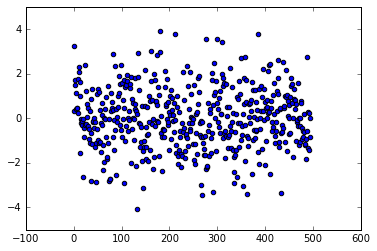

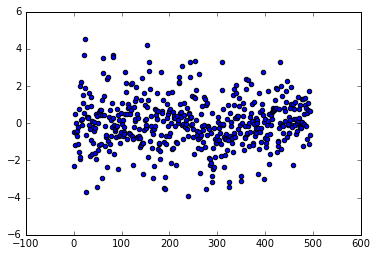

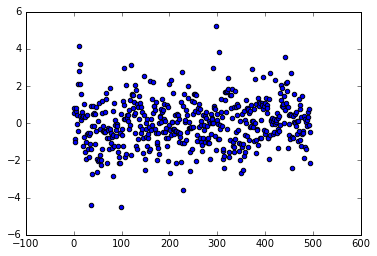

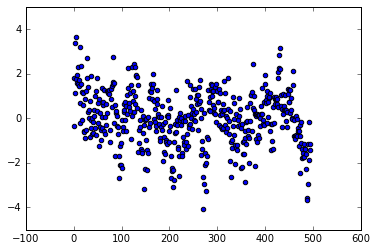

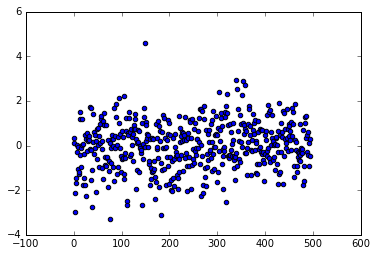

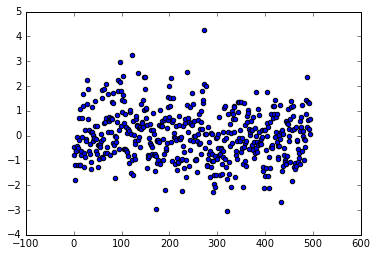

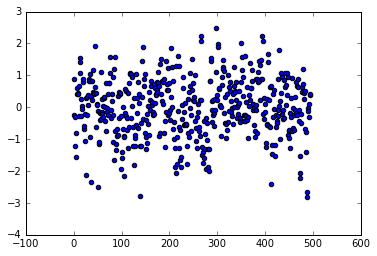

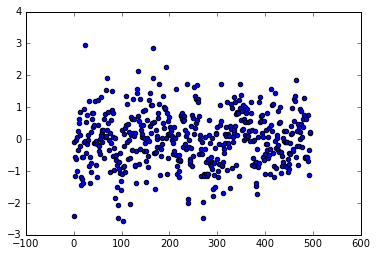

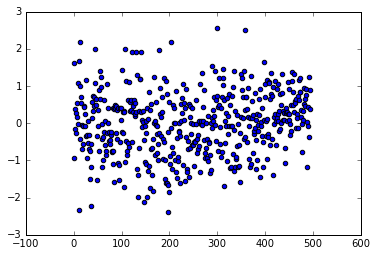

In [22]:
for i in range(12):
    plt.scatter(np.arange(495), pca.fit(X).transform(X)[:,i])
    plt.show()